In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cp.csv to cp.csv


In [5]:
data = pd.read_csv("cp.csv")

In [6]:
np.random.seed(0)
X = data[['x']].values
Y = data[['y']].values

In [8]:
class NeuralNetwork(object):
    def __init__(self):
        self.inputLayerNeurons = 1
        self.hidden1Neurons = 8
        self.hidden2Neurons = 6
        self.outputNeurons = 1
        self.learning_rate = 0.01

        self.W_H1 = np.random.randn(self.inputLayerNeurons, self.hidden1Neurons)
        self.W_H2 = np.random.randn(self.hidden1Neurons, self.hidden2Neurons)
        self.W_O = np.random.randn(self.hidden2Neurons, self.outputNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden1_output = self.sigmoid(np.dot(X, self.W_H1))
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.W_H2))
        pred = self.sigmoid(np.dot(self.hidden2_output, self.W_O))
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_O.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_O += self.hidden2_output.T.dot(output_delta)
        self.W_H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H1 += X.T.dot(hidden1_delta)

    # Train once (like your original style)
    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)

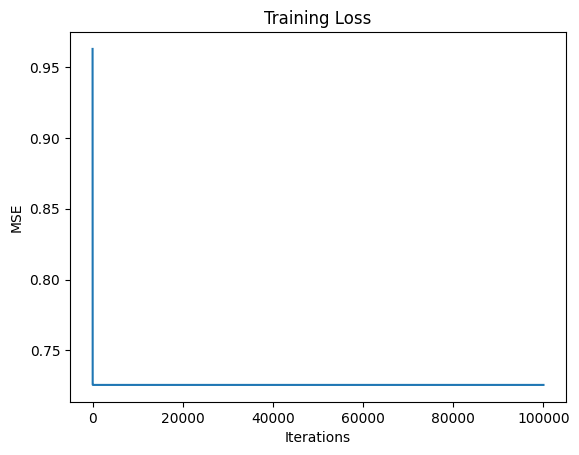

In [9]:
NN = NeuralNetwork()
err = []

for i in range(100000):  # your desired number of iterations
    NN.train(X, Y)
    pred_vals = NN.feedForward(X)
    loss = np.mean(np.square(Y - pred_vals))
    err.append(loss)

# Plot error
plt.plot(err)
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()
